In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn
from sklearn.datasets import load_breast_cancer

In [55]:
cancer = load_breast_cancer()

# Convert to DataFrame
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data['target'] = cancer.target

print(data.shape)
data.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [56]:
data.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [57]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [60]:
results = []
for i in [1, 2, 3, 4, 5]:
    model = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    Accuracy_score = metrics.accuracy_score(y_test, y_pred)
    results.append(Accuracy_score)

print('KNN [ minkowski ]')
print('for n_neighbor=5 : ')
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('\n Confusion Matrix :', conf_mat)
print('Accuracy Score :', Accuracy_score)
print('Accuracy in Percentage :', int(Accuracy_score * 100), '%')
print('\n', classification_report(y_pred, y_test))

print(results)


KNN [ minkowski ]
for n_neighbor=5 : 

 Confusion Matrix : [[ 57   6]
 [  1 107]]
Accuracy Score : 0.9590643274853801
Accuracy in Percentage : 95 %

               precision    recall  f1-score   support

           0       0.90      0.98      0.94        58
           1       0.99      0.95      0.97       113

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[0.935672514619883, 0.9122807017543859, 0.935672514619883, 0.9590643274853801, 0.9590643274853801]


[Text(0.5, 1.0, 'KNN [minkowski, neighbor=5]')]

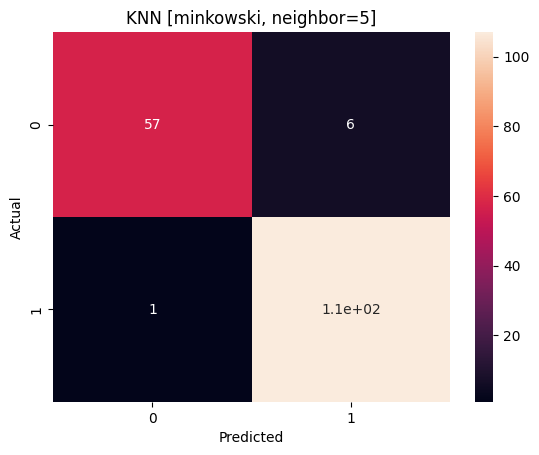

In [61]:
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='KNN [minkowski, neighbor=5]')


In [62]:
models = pd.DataFrame({
    'n_neighbors': ['1', '2', '3', '4', '5'],
    'Accuracy Score': [results[0], results[1], results[2], results[3], results[4]]
})
models.sort_values(by='Accuracy Score')
print(models.to_string(index=False))


n_neighbors  Accuracy Score
          1        0.935673
          2        0.912281
          3        0.935673
          4        0.959064
          5        0.959064


Ex.1

In [63]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


In [64]:
digits = load_digits()

In [65]:
X = digits.data
y = digits.target

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [68]:
y_pred = knn.predict(X_test)

In [69]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 66  0  0  0  0]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  1  0  0  0  0  0  0 42  0]
 [ 0  0  0  1  1  1  0  0  1 55]]


In [70]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.99      1.00      0.99        66
           6       1.00      1.00      1.00        53
           7       1.00      0.98      0.99        55
           8       0.98      0.98      0.98        43
           9       0.98      0.93      0.96        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [71]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9888888888888889


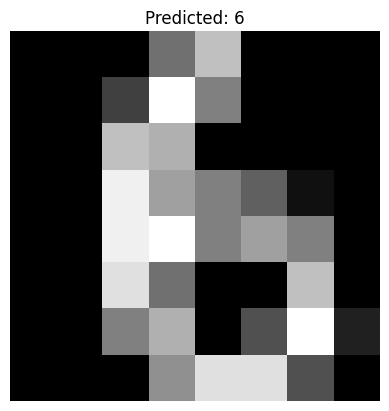

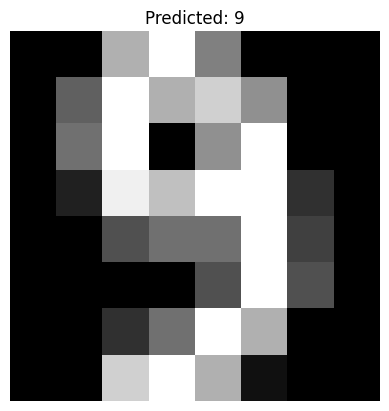

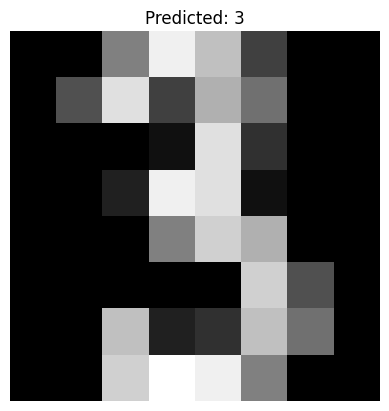

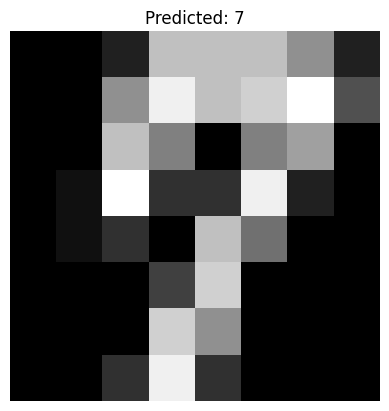

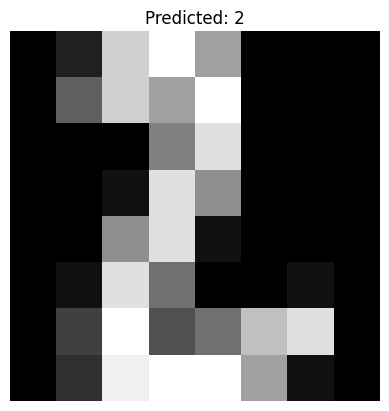

In [72]:
for index, (image, prediction) in enumerate(zip(X_test[:5], y_pred[:5])):
    plt.imshow(image.reshape(8, 8), cmap='gray')
    plt.title(f'Predicted: {prediction}')
    plt.axis('off')
    plt.show()


Ex.2

In [73]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from math import sqrt

# Dataset
data = {
    'Brightness': [40, 50, 60, 10, 70, 60, 25],
    'Saturation': [20, 50, 90, 25, 70, 10, 80],
    'Class': ['Red', 'Blue', 'Blue', 'Red', 'Blue', 'Red', 'Blue']
}

df = pd.DataFrame(data)
print(df)


   Brightness  Saturation Class
0          40          20   Red
1          50          50  Blue
2          60          90  Blue
3          10          25   Red
4          70          70  Blue
5          60          10   Red
6          25          80  Blue


In [74]:
new_point = [55, 65]

def euclidean(p1, p2):
    return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

distances = []
for i, row in df.iterrows():
    dist = euclidean(new_point, [row['Brightness'], row['Saturation']])
    distances.append((i, dist))

distances.sort(key=lambda x: x[1])

print("\nDistances from new point [55, 65]:")
for idx, d in distances:
    print(f"To Row {idx} ({df.loc[idx, 'Class']}): {d:.2f}")



Distances from new point [55, 65]:
To Row 1 (Blue): 15.81
To Row 4 (Blue): 15.81
To Row 2 (Blue): 25.50
To Row 6 (Blue): 33.54
To Row 0 (Red): 47.43
To Row 5 (Red): 55.23
To Row 3 (Red): 60.21


In [75]:
le = LabelEncoder()
df['Class_encoded'] = le.fit_transform(df['Class'])

X = df[['Brightness', 'Saturation']]
y = df['Class_encoded']

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

prediction = knn.predict([new_point])
predicted_class = le.inverse_transform(prediction)

print(f"\nKNN Predicted Class for point {new_point} is: {predicted_class[0]}")



KNN Predicted Class for point [55, 65] is: Blue


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
